# Clasificación con el Algoritmo K Nearest Neighbors



**Objetivo:**
Aplicar el algoritmo de *K-Nearest Neighbors (KNN)* para clasificar reseñas en función de su número de palabras y su valor de sentimiento.

**Contexto:**
Disponemos de un dataset `reviews_sentiment.csv` que contiene 257 registros con Opiniones de usuarios sobre una app (Reviews)
Cada reseña tiene asignado un número de palabras (`wordcount`), una puntuación de sentimiento (`sentimentValue`) y una valoración global (`Star Rating`).

Para este ejercicio vamos a trabajar con **257 reseñas de usuarios sobre una aplicación**. Usaremos **dos columnas de datos** para alimentar nuestro algoritmo.

Solo emplearemos **dos características (features)** porque queremos poder **representarlas en un gráfico de dos dimensiones**. En un caso real, normalmente usaríamos **más variables** para obtener resultados más precisos, pero aquí lo hacemos con fines didácticos.

Las dos columnas que utilizaremos son:

* **wordcount**: la cantidad de palabras que tiene cada opinión.
* **sentimentValue**: un valor que va de **-4 a 4** y que indica si el comentario tiene un tono **negativo o positivo**.

Como **etiquetas** (labels) usaremos las **estrellas** que los usuarios dieron a la app (de **1 a 5**). En general, **más estrellas** suelen reflejar un **sentimiento positivo**, aunque no siempre coincide exactamente.


## 1. Importanción de librerías

En este bloque de código estamos **preparando el entorno de trabajo** importando todas las librerías que usaremos:

* **pandas** y **numpy** → para manejar y procesar los datos.
* **matplotlib** y **seaborn** → para crear gráficas y visualizar los resultados.
* Los comandos de configuración (`%matplotlib inline`, `plt.rcParams`, `plt.style.use`) sirven para **mostrar las gráficas dentro del notebook** y darles un estilo visual agradable.
* **scikit-learn (sklearn)** → para trabajar con el algoritmo de *machine learning* (en este caso, el **K-Nearest Neighbors** o KNN), dividir los datos en conjuntos de entrenamiento y prueba, escalar variables y evaluar el modelo con métricas como precisión, matriz de confusión y reporte de clasificación.

En resumen, con este bloque dejamos listas las herramientas necesarias para manejar datos, graficar y entrenar nuestro modelo.


In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<div style="background-color:green;color:white">

## 2. Cargar y explorar los datos

Carga en un dataframe el reviews_sentiment.csv y muestra las primeras 10 filas. ¿De qué trata este dataset? Utiliza funciones de EDA para entender su contenido y sus opciones.

In [217]:
# Cargar el dataset
df = pd.read_csv("./data/reviews_sentiment.csv", sep=";")
# Mostrar las primeras filas

df.head(10)



,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [218]:
# Mostrar la información del DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB


In [219]:
# mostrar estadísticas descriptivas
df.describe()


,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


`wordcount` -> representa la cantidad de palabras de la reseña  
`Star Rating` -> calificación por estrellas de 1 a 5  
`Sentiment Value` -> valor del sentimiento, a mas valor más positivo, parece que va de 0 a 1, así que es evidente que hay outliers  


<div style="background-color:green;color:white">

¿Qué representa cada variable del conjunto de datos?

¿Hay valores atípicos o ausentes que podrían afectar al modelo?

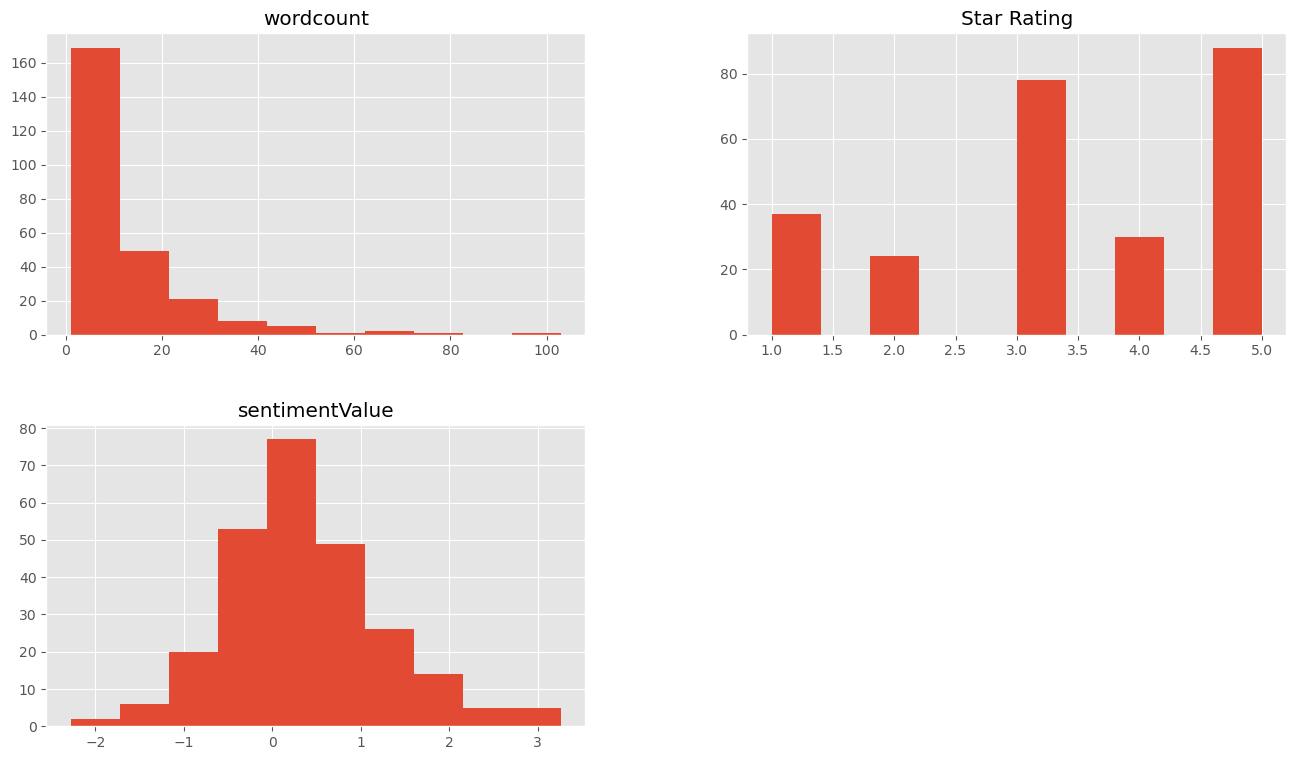

In [220]:
# Mostrar histogramas de las características
df.hist()
plt.show()

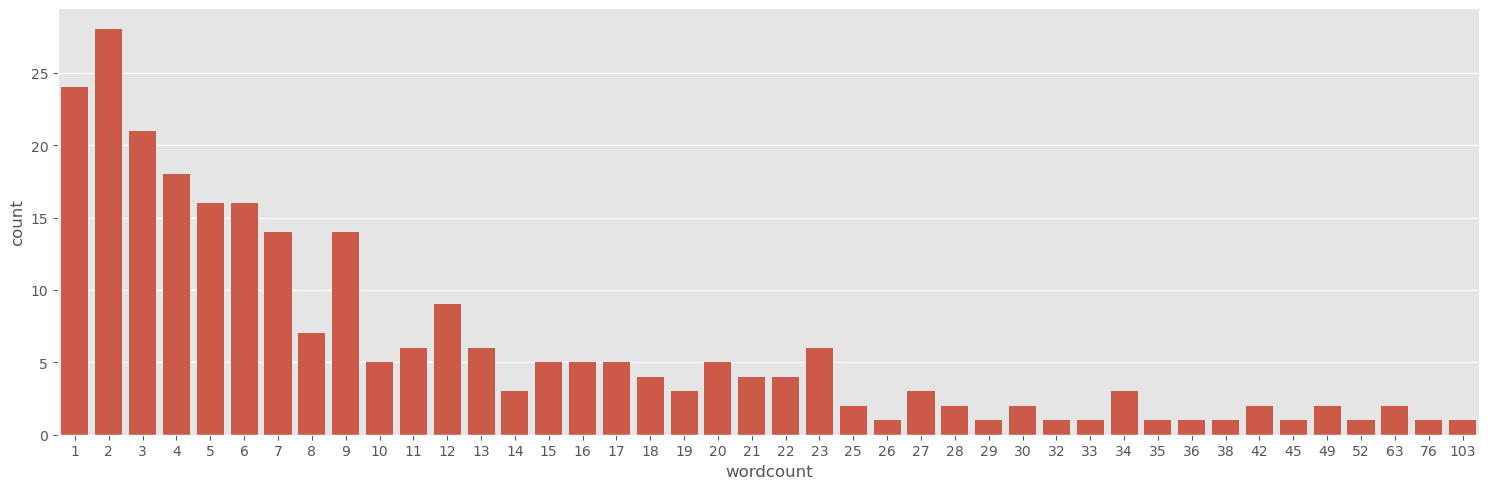

In [221]:
# Mostrar gráfico de conteo de la columna 'wordcount'
sb.catplot(x='wordcount', data=df, kind='count', aspect=3, )


## 2. Preparación de los datos

<div style="background-color:green;color:white">

### 2.1 Seleccionar las variables de entrada y salida

In [222]:
df.isna().sum()

Review Title       0
Review Text        0
wordcount          0
titleSentiment    26
textSentiment      0
Star Rating        0
sentimentValue     0
dtype: int64

No hay valores nulos en las columnas que vamos a utilizar

In [223]:
iqr = df["wordcount"].quantile(.75) - df["wordcount"].quantile(.25)
df["wordcount"] = df["wordcount"].clip(lower=1, upper=df["wordcount"].quantile(.75) + 1.5 * iqr)

<div style="background-color:green;color:white">

### 2.2 Dividir en conjuntos de entrenamiento y prueba

In [224]:
x = df[["wordcount", "sentimentValue"]].values
y = df["Star Rating"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.2)

<div style="background-color:green;color:white">

### 2.3 Normalizar los datos

El KNN se basa en distancias, por lo que es necesario escalar las variables con z-score

In [225]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

<div style="background-color:green;color:white">


## 3. Creación del modelo

Entrenar el modelo KNN con 5 vecinos

In [226]:

# Crear modelo con K=5
knn = KNeighborsClassifier(5)

In [227]:
knn.fit(x_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [228]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(x_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(x_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.93
Accuracy of K-NN classifier on test set: 0.87


## 4.  Evaluar el modelo

In [229]:
y_pred = knn.predict(x_test_scaled)

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred))



Precisión del modelo: 0.8653846153846154

Matriz de confusión:
 [[ 9  1  0  0  0]
 [ 0  2  0  0  0]
 [ 2  1 11  0  0]
 [ 0  1  1  5  0]
 [ 0  0  1  0 18]]

Informe de clasificación:
               precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.40      1.00      0.57         2
           3       0.85      0.79      0.81        14
           4       1.00      0.71      0.83         7
           5       1.00      0.95      0.97        19

    accuracy                           0.87        52
   macro avg       0.81      0.87      0.81        52
weighted avg       0.90      0.87      0.87        52



## 5. Gráficos de la clasificación obtenida

Ahora vamos a graficar los resultados de la clasificación. Esta visualización nos permite ver de forma clara cómo se distribuyen las predicciones en función de las dos variables utilizadas.

Como solo usamos dos características (features), podemos representarlas en un gráfico 2D. Si tuviéramos tres, podríamos hacerlo en 3D, aunque en casos reales, con muchas más dimensiones, lo importante no sería la visualización sino el rendimiento del modelo.

[23.  20.   4.  17.   6.   8.  23.  16.  21.  13.   4.   9.   4.  23.
 14.  20.  26.   7.   5.  22.  13.   7.  18.   4.   2.  29.  30.  35.5
 33.  34.  35.5 34.  35.5 35.5 35.5 27.  32.  35.5 22.  20.  27.   9.
 13.  15.   3.   6.  20.   3.  13.   9.   1.   1.   5.   2.   7.  15.
 23.   4.   9.   3.   8.  10.   6.   3.  19.   1.   1.   1.   1.   1.
  1.   7.   2.   5.   4.   4.  17.  23.   4.  13.  12.   6.  14.   7.
 28.   5.  23.   7.   4.  18.  20.   5.   4.  19.  17.  12.   3.   9.
  5.   6.   2.  18.   4.  15.   5.   4.   1.   1.   6.   6.   4.  16.
 12.   9.  11.   4.   8.  11.   6.  11.   8.   1.  10.   1.   3.   5.
 22.   2.   2.   1.   7.  35.5 35.5 28.  35.5 17.  34.  35.5 16.  35.5
 22.   4.  35.5 27.  35.  17.  16.  21.  16.  21.  21.  12.  25.  25.
 30.  19.  10.   4.   3.   9.   1.   9.   2.   5.   1.  12.   8.  13.
  6.   7.  12.   2.   2.  11.   5.  12.   5.   6.   8.   2.   7.   9.
 12.  11.   5.   3.   6.   3.  10.   4.   3.   2.   2.   2.   6.   2.
  2.   9.   9.   6

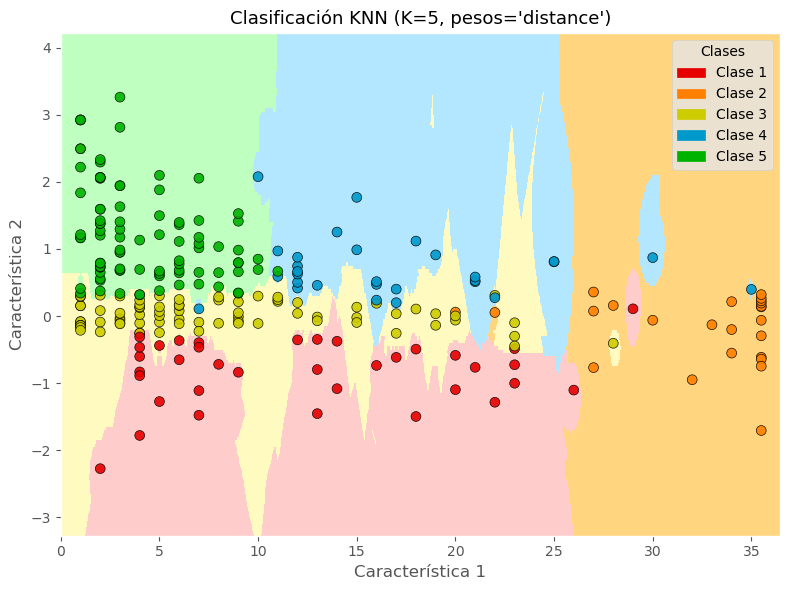

In [230]:
# Parámetros
n_neighbors = 5
h = 0.05  # Paso de la malla (más grande = menos resolución)

# Creamos algunos datos de ejemplo (X, y)
# Sustituir por los reales
# X = datos con 2 características
# y = etiquetas de clase
# clf.fit(X, y) debe haberse hecho antes si ya tienes tus datos

# Colores más contrastados y limpios
cmap_light = ListedColormap(['#FFCCCC', '#FFD580', '#FFFABF', '#B3E6FF', '#BFFFBF'])
cmap_bold  = ListedColormap(['#E60000', '#FF8000', '#CCCC00', '#0099CC', '#00B300'])

# Entrenamiento del clasificador
clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
clf.fit(x, y)
print(x[:, 0])
# Creamos la malla del plano para visualizar las fronteras de decisión
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predicción de la clase para cada punto de la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Figura
plt.figure(figsize=(8, 6))

# Fondo coloreado por clases
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Puntos reales de entrenamiento
scatter = plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold,
                      edgecolor='k', s=50, alpha=0.9)

# Límites del gráfico
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Etiquetas automáticas según las clases detectadas
clases = np.unique(y)
colores = cmap_bold.colors[:len(clases)]
legend_patches = [mpatches.Patch(color=colores[i], label=f'Clase {clases[i]}') for i in range(len(clases))]
plt.legend(handles=legend_patches, title='Clases', loc='upper right')

# Título
plt.title(f"Clasificación KNN (K={n_neighbors}, pesos='distance')", fontsize=13)
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")

plt.tight_layout()
plt.show()



En el gráfico se distinguen **cinco zonas** que muestran la relación entre la **cantidad de palabras** (`wordcount`) y el **valor de sentimiento** (`sentimentValue`) de cada reseña.

![](img/knn-clasification-sectores.png)


Podemos interpretarlas así:

* Una reseña con unas **20 palabras** y un **sentimiento cercano a 1** se ubicaría en la zona **celeste**, correspondiente aproximadamente a una valoración de **4 estrellas**.

A partir de estas regiones se pueden intuir algunos **patrones de comportamiento de los usuarios**:

* **1 estrella:** comentarios con **sentimiento negativo** y hasta **25 palabras**.
* **2 estrellas:** usuarios que **se extienden mucho** (hasta 100 palabras) y cuyo sentimiento varía entre **negativo y ligeramente positivo**.
* **3 estrellas:** reseñas **neutrales** (sentimiento cerca de 0) con unas **25 palabras** aproximadamente.
* **5 estrellas:** opiniones **muy positivas** (sentimiento desde 0.5 en adelante) y **breves**, con menos de **10 palabras**.

En conjunto, estas zonas permiten **visualizar cómo las emociones y la extensión del texto influyen en la puntuación final** que los usuarios otorgan a la aplicación.


## 6. Cálculo del mejor K

En el algoritmo KNN, el número de vecinos (k) indica cuántos puntos cercanos se tienen en cuenta para clasificar un nuevo dato.

Si k es muy pequeño (por ejemplo, 1 o 2) → el modelo se adapta demasiado a los datos de entrenamiento (sobreajuste).

Si k es muy grande → el modelo se vuelve demasiado general y pierde precisión (subajuste).

Por eso probamos distintos valores de k y medimos cuál da mayor precisión en los datos de prueba.
El k que consigue el mejor equilibrio es el que ofrece mayor capacidad de generalización.

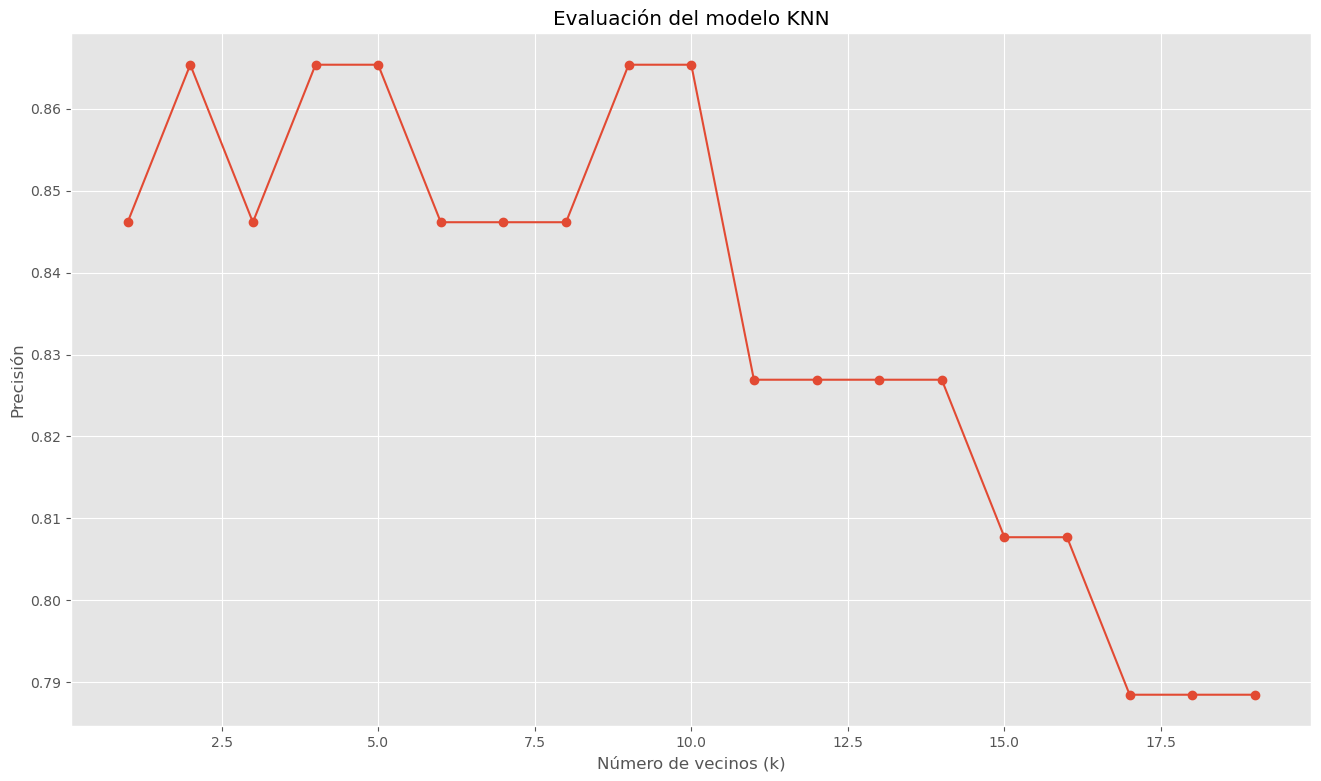

Mejor valor de k: 2 con precisión 0.87


In [231]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    scores.append(knn.score(x_test_scaled, y_test))

plt.figure()
plt.plot(k_range, scores, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión')
plt.title('Evaluación del modelo KNN')
plt.show()

best_k = k_range[scores.index(max(scores))]
print(f"Mejor valor de k: {best_k} con precisión {max(scores):.2f}")

En la gráfica vemos que con valores k=7 a k=14 es donde mayor precisión se logra.



## 7. Cálculo de predicciones

Vamos a pedir al modelo KNN (clf) que haga una predicción del número de estrellas para un nuevo punto con dos características:

- 5 → Representa el número de palabras (wordcount)

- 1.0 → El valor del sentimiento (sentimentValue), muy positivo

In [232]:
print(clf.predict([[5, 1.0]]))

[5]


Esto significa que, según los datos aprendidos,
una reseña con pocas palabras (5) pero sentimiento muy positivo (1.0)
probablemente obtendría una valoración de 5 estrellas.

Ahora vamos a utilizar el método ``predict_proba`` que no devuelve la clase directamente, sino las probabilidades de pertenecer a cada una de las clases posibles.

In [233]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00249744 0.02527227 0.97223028 0.         0.        ]]


En el ejemplo, para una reseña con **20 palabras** y un **sentimiento neutro (0.0)**, el resultado fue:

| Estrellas | Probabilidad |
| --------- | ------------ |
| ⭐ 1       | 0.4%         |
| ⭐ 2       | 2.5%         |
| ⭐ 3       | **97.1%**    |
| ⭐ 4       | 0%           |
| ⭐ 5       | 0%           |

El modelo calcula la **probabilidad de que una reseña pertenezca a cada categoría de estrellas** (de 1 a 5) según sus características.

El modelo considera que esa reseña tiene una **altísima probabilidad (97%) de corresponder a 3 estrellas**, lo que indica una **valoración intermedia o neutral**.

En resumen, cuando el comentario no expresa ni sentimientos muy positivos ni negativos y tiene una extensión media, el modelo predice una calificación **moderada (3 estrellas)**.


## **Ejercicio : Diagnóstico de diabetes con KNN**

### 🎯 Objetivo

Entrenar un modelo de **clasificación supervisada** usando el algoritmo **K-Nearest Neighbors (KNN)** para predecir si una persona presenta **diabetes (1)** o no (0), según distintas medidas clínicas.

---

### 📘 Contexto

El dataset `diabetes.csv` contiene observaciones médicas de mujeres mayores de 21 años con las siguientes variables:

| Variable                 | Descripción                                |
| ------------------------ | ------------------------------------------ |
| Pregnancies              | Número de embarazos                        |
| Glucose                  | Nivel de glucosa en sangre                 |
| BloodPressure            | Presión arterial diastólica                |
| SkinThickness            | Espesor del pliegue cutáneo (mm)           |
| Insulin                  | Nivel de insulina (mu U/ml)                |
| BMI                      | Índice de masa corporal                    |
| DiabetesPedigreeFunction | Factor hereditario (riesgo genético)       |
| Age                      | Edad (años)                                |
| Outcome                  | 1 = tiene diabetes / 0 = no tiene diabetes |


---
<div style="background-color:green;color:white">

## Paso 1. Cargar y explorar los datos

In [234]:
df = pd.read_csv("./data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [235]:
# mostrar la información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [236]:
# Eliminar valores repetidos en cada columna
df = df.drop_duplicates()

In [237]:
# Mostrar estadísticas descriptivas
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [238]:
df['Outcome'].value_counts(sort=False)

Outcome
1    268
0    500
Name: count, dtype: int64

In [239]:
# Verificar valores nulos en el DataFrame
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

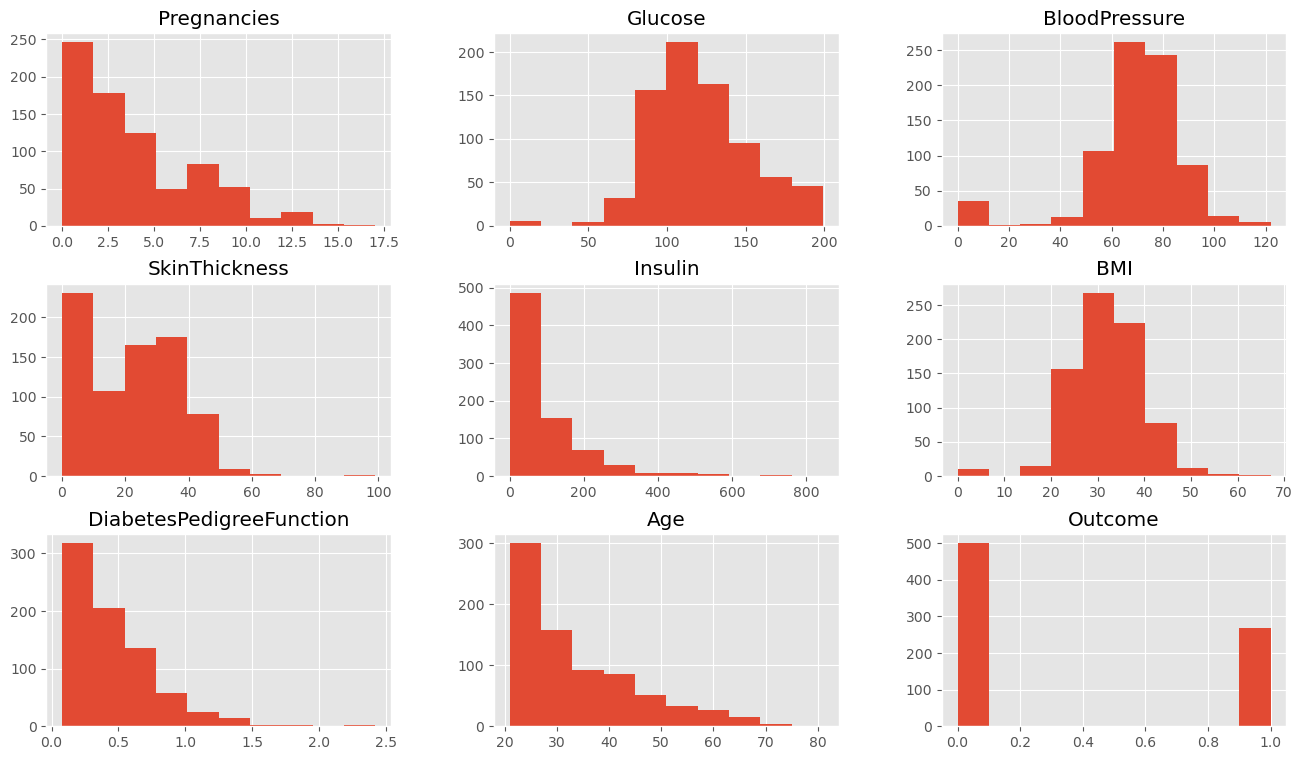

In [240]:
df.hist()
plt.show()

<div style="background-color:green;color:white">

**Preguntas:**

* ¿Hay datos repetidos o nulos?
* ¿Existen outliers?
* Hay más proporción de clase 0 (no diabetes) que con clase 1 (con diabetes 1)

- No hay datos ni repetidos ni nulos
- Es evidente que existen outliers. Hay algún dato que dice que una persona ha tenido 17 embarazos. También gente que no tiene presión sanguínea o que no tienen BMI, por lo tanto o están muertos o son etéreos. Es evidente que esos casos no nos interesan.
- La cantidad de gente con diabetes en el dataset es 34.89%

Corrección de outliers

In [241]:
# SkinThickness. Mas de 60 es biologicamente implausible. Pondre un limite sobre 80
df["SkinThickness"] = df["SkinThickness"].replace(0, np.nan)
# Imposible tener insulina 0 en una persona viva
df["Insulin"] = df["Insulin"].replace(0, np.nan)
# Es imposible tener un BMI de 0 implicaría no tener masa y eso es físicamente imposible.
df["BMI"] = df["BMI"].replace(0, np.nan)
# No llega a cero nunca ni en casos de hiperglucemia.
df["Glucose"] = df["Glucose"].replace(0, np.nan)


# Se quitan valores extremos para la siguiente parte
df["Glucose"] = df["Glucose"].clip(40, 200)
df["BloodPressure"] = df["BloodPressure"].clip(30, 130)
df["SkinThickness"] = df["SkinThickness"].clip(1, 60)
df["Insulin"] = df["Insulin"].clip(10, 400)
df["BMI"] = df["BMI"].clip(10, 60)


Al haber introducido datos nulos, KNN no puede manejarlos, por lo tanto utilizamos el imputador, para que estos valores nulos que se acaban de introducir, se sustituyan por la media de aquellos valores que más parecidos sean.

In [242]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)
df = pd.DataFrame(df_imputed, columns=df.columns)

<div style="background-color:green;color:white">

### Paso 2. Seleccionar variables relevantes

Eliminar la columna (axis=1) Outcome de X y dejar en y solo la columna Outcome

In [243]:
y = df[["Outcome"]].values
X = df.drop(columns=["Outcome"], axis=1).values

<div style="background-color:green;color:white">

### Paso 3. Dividir en entrenamiento y prueba

Asegurarse de manenter la misma proporción de clases con el parámetro stratify

In [244]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


Undersampleamos los datos para que tanto diabéticos cómo no diabéticos estén igualmente representados

In [245]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
y_train = y_resampled

<div style="background-color:green;color:white">

### Paso 4. Normalizar los datos

KNN depende de las distancias, así que es importante escalar las variables:


In [246]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

<div style="background-color:green;color:white">

###  Paso 5. Entrenar el modelo con un valor inicial de K

In [289]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

knn = KNeighborsClassifier(n_neighbors=4, n_jobs=16)

knn.fit(X_train_scaled, y_resampled)



,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,16


Datos de entrenamiento

Accuracy: 0.808
Precision: 0.871
Recall: 0.724
F1-score: 0.791


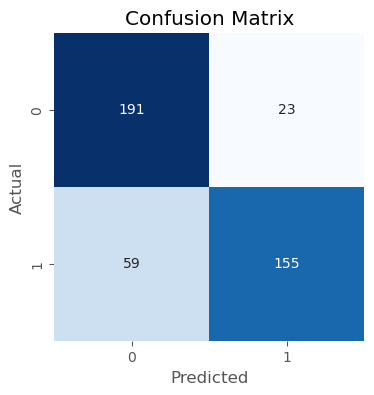

In [290]:
y_pred = knn.predict(X_train_scaled)

accuracy = accuracy_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Datos de test

Accuracy: 0.760
Precision: 0.635
Recall: 0.741
F1-score: 0.684


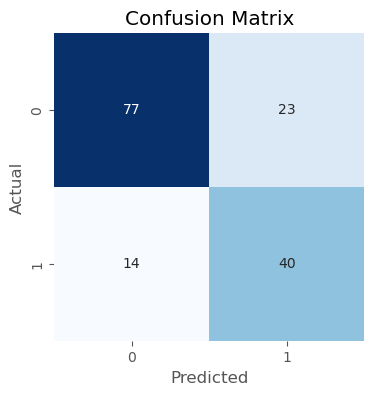

In [288]:
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<div style="background-color:green;color:white">

**Preguntas:**

* ¿La precisión es parecida entre entrenamiento y prueba?
* ¿Qué pasaría si usas un valor de *k* más alto o más bajo?

- No, es muy distinta siendo superior la de entrenamiento a la de prueba
- Usando diferentes valores de k hay resultados muy diferentes.
    - Si bajamos la k, todas las métricas resultarán peores con el conjunto de datos de prueba. Sin embargo, en el de entrenamiento mejorarán, yendo hasta el valor de 1, que entonces al ser el mismo dataset simplemente coge el más cercano que es el propio valor y tiene métricas perfectas, lo cual no interesa mucho.
    - Al aumentar el valor de 5 en cinco hasta 15, la precisión con los datos de entrenamiento bajaba ligeramente, mientras que pasaba justo lo contrario con los datos de prueba.
    - Tras hacer un ajuste para que ambas clases estuvieran igualmente representadas, el resultado variando el valor de la k ha sido el contrario con el valor más idóneo siendo 4.

### Paso 6. Buscar el mejor valor de K

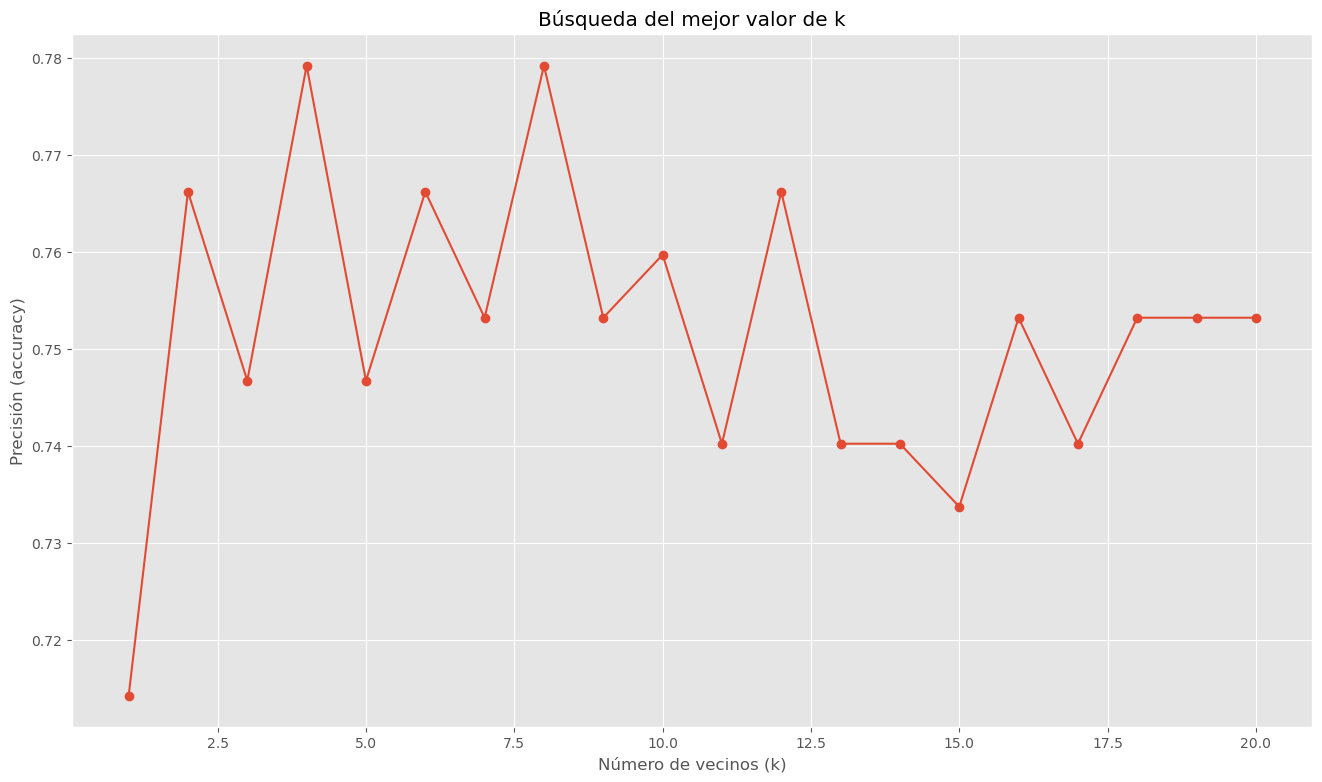

Mejor k: 4 con precisión 0.78


In [268]:
import matplotlib.pyplot as plt

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.plot(k_range, scores, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión (accuracy)')
plt.title('Búsqueda del mejor valor de k')
plt.show()

best_k = k_range[scores.index(max(scores))]
print(f"Mejor k: {best_k} con precisión {max(scores):.2f}")

Escogeré 8 porque tiene un valor sino igual, muy similar y el modelo será menos propenso al _overfitting_.

<div style="background-color:green;color:white">

### Paso 7. Entrenar de nuevo el modelo con el valor óptimo de K


In [311]:
# Entrenar el modelo final con el mejor valor de k encontrado
knn = KNeighborsClassifier(n_neighbors=8, n_jobs=16)
knn.fit(X_train_scaled, y_resampled)
y_pred = knn.predict(X_test_scaled)

<div style="background-color:green;color:white">

### Paso 8. Evaluar el modelo de clasificación

Una vez entrenado el modelo con el mejor valor de k, debemos comprobar cómo de bien distingue entre películas exitosas y no exitosas.

#### 1. Matriz de confusión

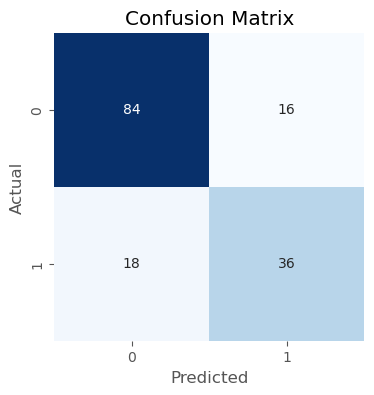

In [312]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<div style="background-color:green;color:white">

#### 2. Informe de clasificación

In [313]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83       100
         1.0       0.69      0.67      0.68        54

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



<div style="background-color:green;color:white">

#### 3. Precisión general

In [302]:
print("Precisión general: ", accuracy_score(y_test, y_pred))

Precisión general:  0.7792207792207793


In [307]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
for i in result.importances_mean.argsort()[::-1]:
    print(f"{df.columns[i]}: {result.importances_mean[i]:.4f}")


Glucose: 0.0682
Pregnancies: 0.0630
DiabetesPedigreeFunction: 0.0526
Age: 0.0455
Insulin: 0.0370
SkinThickness: 0.0279
BMI: 0.0279
BloodPressure: 0.0201


<div style="background-color:green;color:white">

**Reflexión**

1. ¿Qué variables parecen influir más en el diagnóstico (glucosa, IMC, edad...)?
2. ¿Qué valor de *k* produjo mejores resultados?
3. ¿Qué tipo de errores comete el modelo (falsos positivos o negativos)?
4. ¿Por qué crees que es importante normalizar los datos antes de usar KNN?

- La función `permutation_importance` da los factores que predicen más la diabetes. El primero siendo la glucosa y el segundo sorprendentemente el número de embarazos. Es curioso, pero parece ser verídico con la [investigación científica](https://pmc.ncbi.nlm.nih.gov/articles/PMC7153959/) sobre el tema. Esto se corrobora con [otros estudios](https://pmc.ncbi.nlm.nih.gov/articles/PMC9016728/)
- Tanto 4 cómo 8 produjeron buenos resultados. Escogí 8 para que hubiera menor _overfitting_ y el modelo aprendiera más del caso general.
- La media con pesos indica que tanto _precision_ como _recall_ son iguales. Por lo tanto comete ambos tipos de errores.
- Al ser un modelo que se basa en distancias entre los puntos, si no se normaliza, datos que tendrían que estar muy cerca unos de otros se encontrarían muy lejos solo por la escala en la que se miden estos datos.

<div style="background-color:green;color:white">

### Paso 8. redicción de nuevos pacientes

Una vez entrenado y evaluado el modelo KNN, queremos utilizarlo para diagnosticar nuevos casos clínicos.

Disponemos de dos pacientes cuyas características médicas han sido registradas.

Tu tarea consiste en predecir si cada uno de ellos presenta diabetes o no según los valores introducidos.

### 🧍‍♀️ **Paciente 1**

* **Embarazos:** 5
* **Glucosa:** 165
* **Presión arterial:** 85
* **Espesor de piel:** 25
* **Insulina:** 130
* **IMC:** 35.5
* **Pedigree:** 0.63
* **Edad:** 45

👉 Se sospecha que presenta síntomas de diabetes.

---

### 🧍‍♂️ **Paciente 2**

* **Embarazos:** 1
* **Glucosa:** 90
* **Presión arterial:** 70
* **Espesor de piel:** 20
* **Insulina:** 85
* **IMC:** 22.5
* **Pedigree:** 0.35
* **Edad:** 28

👉 Se sospecha que **no presenta diabetes**.

In [339]:
series = pd.DataFrame({
    "1": {
        "Pregnancies": 5,
        "Glucose": 165,
        "BloodPressure": 85,
        "SkinThickness": 25,
        "Insulin": 130,
        "BMI": 35.5,
        "DiabetesPedigreeFunction": 0.63,
        "Age": 45
    }, 
    "2": {
        "Pregnancies": 1,
        "Glucose": 90,
        "BloodPressure": 75,
        "SkinThickness": 20,
        "Insulin": 85,
        "BMI": 22.5,
        "DiabetesPedigreeFunction": 0.35,
        "Age": 28
    }
}).T
scaler = StandardScaler()
series_scaled = scaler.fit_transform(series)
print(knn.predict(series_scaled)) # El modelo predijo correctamente las sospechas.


[1. 0.]


# Webgrafia

* [Documentación scikit-learn](https://scikit-learn.org/stable/modules/neighbors.html#classification)
* [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
* [Libro "Hands on Machine Learning with ScikitLearn, Keras y TensorFlow" de Aurelien Geron y su repositorio de ejemplos ](https://github.com/ageron/handson-ml)
* [Aprende ML de Juan Ignacio Bagnato](https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/)
* [Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
* [DataCamp](https://www.datacamp.com/)


# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.